In [1]:
#!pip install texthero -q
#!pip install -q kaggle 
#!pip install wordcloud -q
#!pip install -U textblob -q
#!python -m textblob.download_corpora -q

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import seaborn as sns
import os
from wordcloud import WordCloud

#import texthero as hero
#from texthero import stopwords
#import nltk 
#nltk.download('wordnet') -q
#from nltk.stem import WordNetLemmatizer
#from textblob import TextBlob,Word


In [27]:
data= pd.read_csv('train_all_tasks.csv') 
data.head(10)

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
5,sexism2022_english-10376,yeah but in order to keep the benefit i have t...,not sexist,none,none
6,sexism2022_english-4569,Hahaha I just wish they would live their truth...,not sexist,none,none
7,sexism2022_english-91,head mod said she talked to him after he made ...,not sexist,none,none
8,sexism2022_english-10142,"just the inside of your wallet: cash, bank car...",sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...
9,sexism2022_english-16316,We most definitely did. I didn’t go too much i...,not sexist,none,none


Multiple or Just One Label per Class


In [8]:
data['label_cataegory'].unique()

array(['none', '2.3 dehumanising attacks & overt sexual objectification',
       '2.1 descriptive attacks',
       '1.2 incitement and encouragement of harm',
       '3.1 casual use of gendered slurs, profanities, and insults',
       '4.2 supporting systemic discrimination against women as a group',
       '2.2 aggressive and emotive attacks',
       '3.2 immutable gender differences and gender stereotypes',
       '3.4 condescending explanations or unwelcome advice',
       '3.3 backhanded gendered compliments',
       '4.1 supporting mistreatment of individual women',
       '1.1 threats of harm'], dtype=object)

In [ ]:
data['text'][8]

'just the inside of your wallet: cash, bank cards, credit cards, debit cards. That is the inside that matters to femoids.'

# Distribution of Sexism Labels

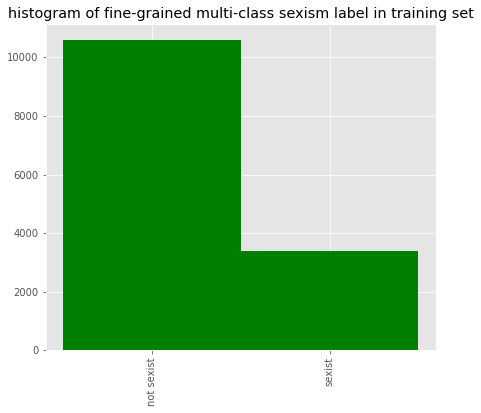

In [ ]:
plt.style.use('ggplot')
vector_size = data['label_sexist'].nunique()
plt.rcParams["figure.figsize"] = (7,6)
plt.xticks(rotation=90)
plt.hist(data['label_sexist'],bins=np.arange(-0.5,vector_size,1),color='green', width = 1)
plt.title('histogram of fine-grained multi-class sexism label in training set')
plt.show()

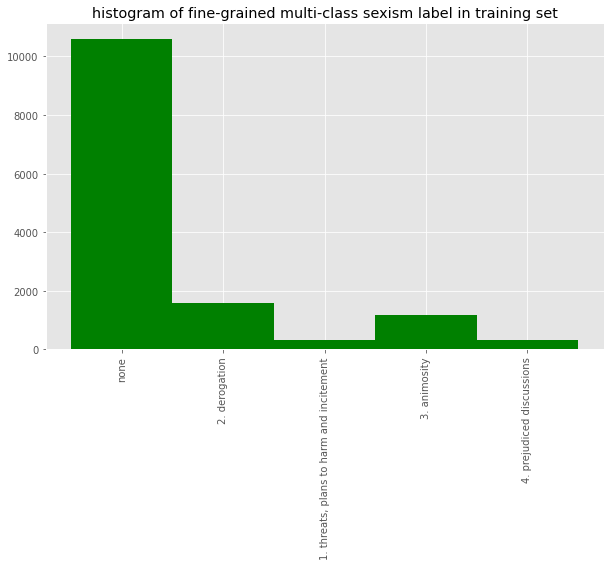

In [ ]:
plt.style.use('ggplot')
vector_size = data['label_category'].nunique()
plt.rcParams["figure.figsize"] = (10,6)
plt.xticks(rotation=90)
plt.hist(data['label_category'],bins=np.arange(-0.5,vector_size,1),color='green',width=1)
plt.title('histogram of fine-grained multi-class sexism label in training set')
plt.show()

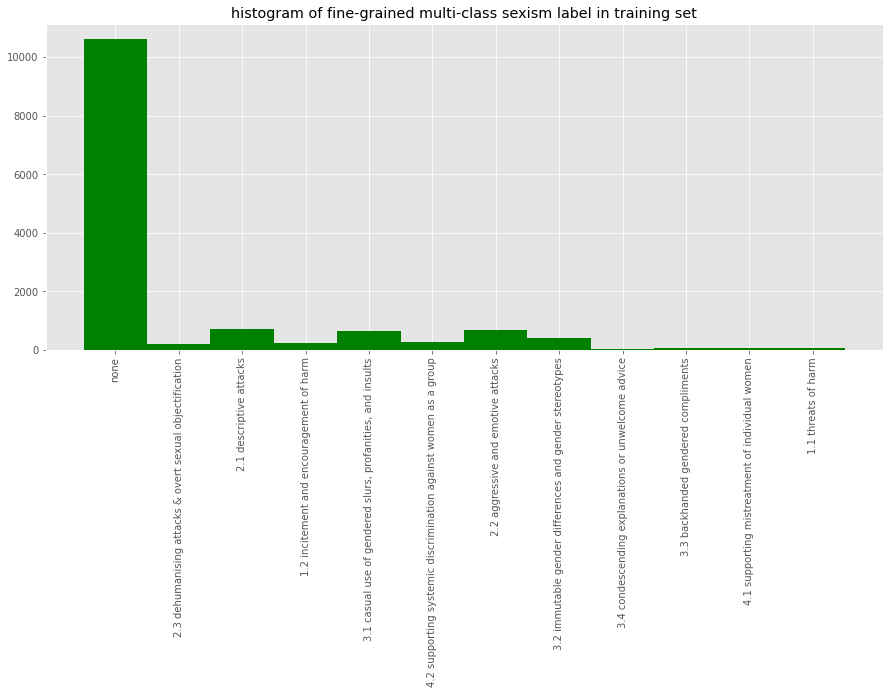

In [ ]:
plt.style.use('ggplot')
vector_size = data['label_vector'].nunique()
plt.rcParams["figure.figsize"] = (15,6)
plt.xticks(rotation=90)
plt.hist(data['label_vector'],bins=np.arange(-0.5,vector_size,1),color='green',width=1)
plt.title('histogram of fine-grained multi-class sexism label in training set')
plt.show()

## Sentiment Analysis

In [10]:
!pip install -q transformers
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")

data_list = data['text'].tolist()

     |████████████████████████████████| 5.8 MB 5.4 MB/s 
     |████████████████████████████████| 182 kB 64.9 MB/s 
     |████████████████████████████████| 7.6 MB 36.3 MB/s 


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [19]:
data = ["I love you", "I hate you", "I hate you"]
results = sentiment_pipeline.predict(data)

#average positive sentiment
for result in results: 
  if result['label']=="POSITIVE":
    result['label']=1
  else:
    result['label']=-1


In [21]:
sentiment_all_weighted = []

for result in results: 
  sentiment_single_weighted = result['label']*result['score']
  sentiment_all_weighted.append(sentiment_single_weighted)



In [23]:
import statistics

sentiment_all_weighted_mean = statistics.mean(sentiment_all_weighted)
sentiment_all_weighted_mean

-0.3332395354906718